In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def f(x):
    return x **2 + 3
x = np.arange(-2,4,.1)

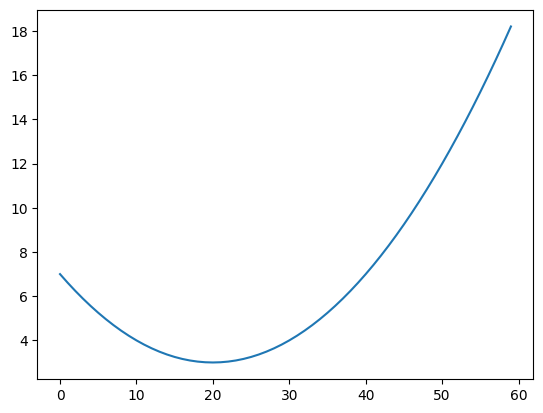

In [6]:
plt.plot(f(x))

In [11]:
a = 2
b = -3
c = 10

f = a*b+c
h = 0.001
b += h
f2 = a*b+c

print(f)
print(f2)

4
4.002


In [24]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._children:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir':'LR'})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label=f'{n.value}', shape='record')
        if n._op:
            dot.node(name=uid + n._op, label=n._op)
            dot.edge(uid + n._op, uid)
    
    return dot

In [22]:
class Node:
    def __init__(self, value, _children=set(), _op=[]):
        self.value = value
        self._children = _children
        self._op = _op

    def __repr__(self) -> str:
        return f"Node(value = {self.value})"
    
    def __add__(self, other):
        return Node(self.value + other.value, (self, other), '+')
    
    def __mul__(self, other):
        return Node(self.value + other.value, (self, other), '*')
    
a = Node(2.0)
b = Node(-3.0)
c = Node(10)
d = a*b+c
d

Node(value = 9.0)

In [25]:
draw_dot(d)

AttributeError: 'Node' object has no attribute '_prev'